In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as stat

In [2]:
survey_raw = pd.read_csv("Raw_survey_data.csv")

In [3]:
#loi = level of interest
#!!!  Depended, don't delete !!!
gender_loi = survey_raw[['Sex','q5']]
#!!!  Depened, don't delete  !!!
gender_raw = survey_raw.groupby("Sex")
total_male = len(gender_raw.get_group(1))
total_female = len(gender_raw.get_group(2))
#Experiment, count sum of each Sex
#1 = Male, 2 = Female
gender_total = survey_raw[['№',"Sex"]].groupby("Sex").count()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

/Users/BlueWight/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/BlueWight/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/BlueWight/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/BlueWight/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33865 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/BlueWight/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/BlueWight/opt/anaconda3/lib/python3.8/

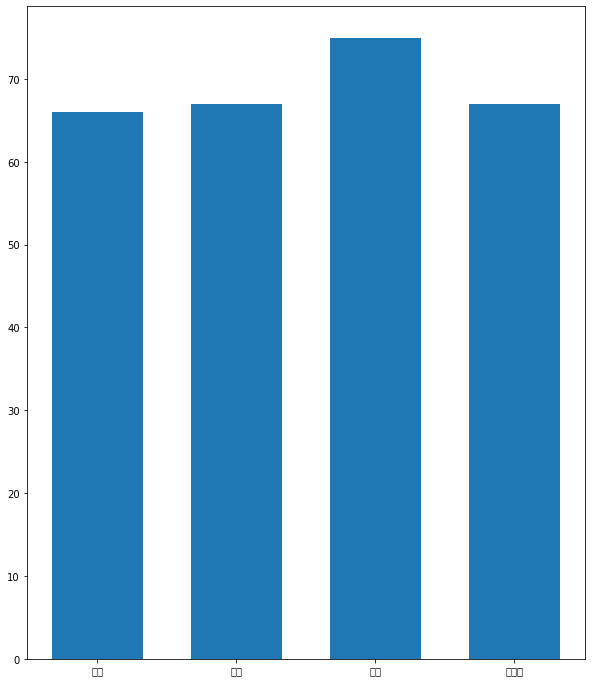

In [4]:
#-------------------------------------------------------------------------------------#
#Quick Overview of the Data !!!TO BE USED IN PAPER                                    #  
#-------------------------------------------------------------------------------------#
# dummies = pd.DataFrame(,columns = ["dummy"])
# fig, axes = plt.subplots(3, 1, figsize=(8, 16))
groupedby_Age_Catagory=survey_raw 
groupedby_Age_Catagory["dummy"] = [1]*1600
groupedby_Age_Catagory_and_gender =  groupedby_Age_Catagory.groupby(["Sex","Age_Catagory"]) 
groupedby_Age_Catagory = groupedby_Age_Catagory.groupby(["Age_Catagory"]).count()
groupedby_Age_Catagory_and_gender = groupedby_Age_Catagory_and_gender.count()

# groupedby_Age_Catagory["dummy"].plot(kind="bar")
# groupedby_Age_Catagory_and_gender["dummy"][1].plot(kind = "bar",ax = axes[1],title="Male")
# groupedby_Age_Catagory_and_gender["dummy"][2].plot(kind = "bar",ax = axes[2],title="Female")
# groupedby_Age_Catagory["dummy"].plot(kind="bar",ax = axes[0],title="All")

# Distribution based on location and gender-age
pivot_location_genderAndAge = survey_raw.pivot_table("dummy",index = "Prefecture_code",columns = ["Age_Catagory"],aggfunc = sum)
for each in pivot_location_genderAndAge:
    dic = []
#Normalize the value since male and female recipiants are not the same 
# pivot_location_genderAndAge[1] = pivot_location_genderAndAge[1]/total_male
# pivot_location_genderAndAge[2] = pivot_location_genderAndAge[2]/total_female
# (pivot_location_genderAndAge[1]).plot(kind = "bar",figsize = (20,10),title = "Male")
# (pivot_location_genderAndAge[2]).plot(kind = "bar",figsize = (20,10),title = "Female")
# pivot_location_genderAndAge.plot(kind = "bar",figsize = (20,10))
pivot_location_genderAndAge
#------Graph------#

labels = ["埼玉","千葉","東京","神奈川"]
fig, ax = plt.subplots(figsize = (10,12))

pre = 0
all_levels = []
for i in range(5):
    tempA = []
    for each in range(11,15):
        temp = pivot_location_genderAndAge.loc[each]
        temp = temp.loc[i+2]
        tempA.append(temp)
    all_levels.append(tempA)
all_levels[0]
ax.bar(labels,all_levels[0],width = 0.65,bottom=pre,label = "20s")
pre =[0]*5
for i in range(1,4):
    pre = pre+all_levels[i-1]
    ax.bar(labels,all_levels[i],width = 0.65,bottom=pre,label = "{}0s".format(i+2))
ax.set_title("Distribution of Male and Female population in four Tokyo-Metropolitan Prefectures")
ax.legend()
plt.show()

# plt.savefig('Distribution_of_Male_and_Female_population.png')

In [ ]:

#------Graph------#

labels = ["埼玉", "千葉","東京","神奈川"]
fig, ax = plt.subplots(figsize = (10,12))
# ax.bar(labels, pivot_location_genderAndAge.loc[11][0],width = 0.65,label = "11")
pre = 0
all_levels = []
for i in range(11,15):
    temp = pivot_location_genderAndAge.loc[i]
    all_levels.append(temp.loc[1])
ax.bar(labels,all_levels,width = 0.65,bottom=pre,label = "Male")
pre = all_levels
all_levels = []
for i in range(11,15):
    temp = pivot_location_genderAndAge.loc[i]
    all_levels.append(temp.loc[2])
ax.bar(labels,all_levels,width = 0.65,bottom=pre,label = "Female")

ax.set_title("Distribution of Male and Female population in four Tokyo-Metropolitan Prefectures")
ax.legend()

plt.savefig('Distribution_of_Male_and_Female_population.png')

In [ ]:
gender_loi_grouped_male = gender_loi.groupby(["Sex"]).get_group(1)
gender_loi_grouped_female = gender_loi.groupby(["Sex"]).get_group(2)

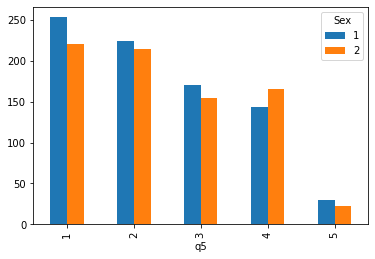

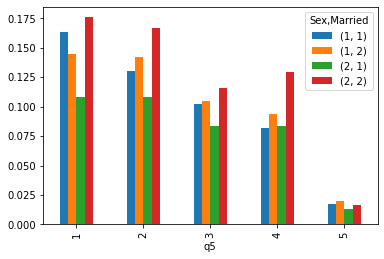

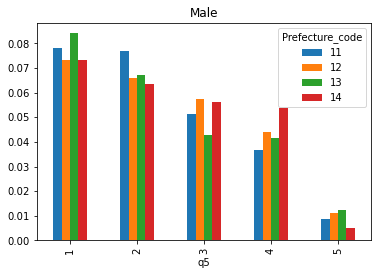

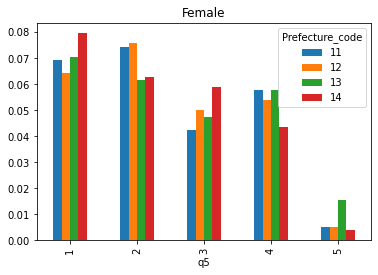

In [5]:
#------------------------------------------------------------------------------------------------------------------#
#Examine difference in level of interest on Market between male and female, based on locationa and marriage status #  
#------------------------------------------------------------------------------------------------------------------#
# gender_loi_grouped_male_bar = gender_loi_grouped_male.groupby(["q5"]).sum()/int(gender_total.loc[1])
# gender_loi_grouped_female_bar = gender_loi_grouped_female.groupby(["q5"]).sum()/int(gender_total.loc[2])
# # gender_loi_grouped_male_bar.plot(kind="bar")
# (gender_loi_grouped_female_bar/2).plot(kind="bar")
# gender_loi_grouped_male_bar.plot(kind="bar")
# gender_loi_grouped_male_bar.plot()
# plt.plot((gender_loi_grouped_female_bar/2))
# fig = plt.figure()
# female_loi = fig.add_subplot(1,2,1)
# female_loi = fig.add_subplot(1,2,2)
# loi_gender_plt[0].hist(gender_loi_grouped_male_bar)
# # gender_loi_grouped_female_bar.plot(kind="bar")
# loi_gender_plt[1].hist(gender_loi_grouped_female_bar)
# loi_gender_plt[1].set_title("Level of Interest Comparison Based on Gender")
# loi_gender_plt[1].set_xlabel("Level of Interest")
# loi_gender_plt[1].set_ylabel("Percentage of Answer")
pivot_loi_gender = survey_raw.pivot_table("dummy",index = "q5",columns = ["Sex"],aggfunc = sum)
#Marriage
pivot_loi_gender_married = survey_raw.pivot_table("dummy",index = "q5",columns = ["Sex","Married"],aggfunc = sum)
pivot_loi_gender_married[1] = pivot_loi_gender_married[1] / total_male
pivot_loi_gender_married[2] = pivot_loi_gender_married[2] / total_female
#Prefecture of Living
pivot_loi_gender_prefecture = survey_raw.pivot_table("dummy",index = "q5",columns = ["Sex","Prefecture_code"],aggfunc = sum)
pivot_loi_gender_prefecture[1] = pivot_loi_gender_prefecture[1] / total_male
pivot_loi_gender_prefecture[2] = pivot_loi_gender_prefecture[2] / total_female
pivot_loi_gender.plot(kind = "bar")
pivot_loi_gender_married.plot(kind = "bar")
pivot_loi_gender_prefecture[1].plot(kind = "bar",title="Male")
pivot_loi_gender_prefecture[2].plot(kind = "bar",title="Female")

In [ ]:
survey_raw = survey_raw

In [7]:
#--------------------------------------------------------------------------#
# Examine LOI for market based on age and living type, with respect to sex #  
#--------------------------------------------------------------------------#
pivot_gender_age = survey_raw.pivot_table("dummy",index = "q5", columns = ["Sex","Age_Catagory"],aggfunc = sum)
pivot_gender_age[1] = pivot_gender_age[1]/total_male
pivot_gender_age[2] = pivot_gender_age[2]/total_female
# pivot_gender_age.plot(kind = "bar",figsize = (20,10))
pivot_gender_typeOfRes = survey_raw.pivot_table("dummy",index = "q5", columns = ["Sex","q17"],aggfunc = sum)
pivot_gender_typeOfRes[1] = pivot_gender_typeOfRes[1]/total_male
pivot_gender_typeOfRes[2] = pivot_gender_typeOfRes[2]/total_female
# pivot_gender_typeOfRes.plot(kind = "bar", figsize = (20,10))

q17
1    450
2     50
3    400
4    668
5     24
6      1
7      7
Name: dummy, dtype: int64


<AxesSubplot:xlabel='q5'>

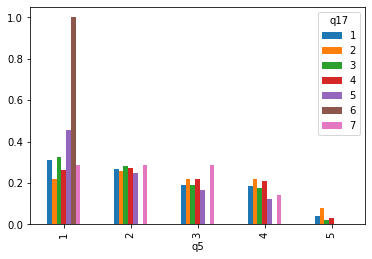

In [11]:
pivot_typeOfRes = survey_raw.pivot_table("dummy",index = "q5", columns = ["q17"],aggfunc = sum)
typeOfRes = survey_raw.groupby("q17").count()
typeOfRes_count = typeOfRes["dummy"]
print(typeOfRes_count)
for i in range(1,8):
    pivot_typeOfRes[i] = pivot_typeOfRes[i]/typeOfRes_count[i]
pivot_typeOfRes.plot(kind = "bar")

In [12]:
#----------------------------------------------------------------------------#
#Examine difference in level of interest between married and unmarried female#  
#----------------------------------------------------------------------------#
#Inital Filtering
female_only = gender_raw.get_group(2)
female_marriage_count = female_only.groupby("Married").count()
female_married_total = female_marriage_count["№"][2] 
female_single_total = female_marriage_count["№"][1] 

#Deep Filtering
female_marriage_loi = female_only[["Married","q5"]]
loi_grouped_single = female_marriage_loi.groupby(["Married"]).get_group(1)
loi_grouped_married = female_marriage_loi.groupby(["Married"]).get_group(2)
loi_grouped_single_bar = (loi_grouped_single.groupby(["q5"]).count())/female_single_total
loi_grouped_married_bar = (loi_grouped_married.groupby(["q5"]).count())/female_married_total

#Graphs
# graph = loi_grouped_single_bar.plot(kind="bar",title="Single",xlabel = "Level of Interest",ylabel = "Percentage")
# grahp2 = loi_grouped_married_bar.plot(kind="bar",title="Married",xlabel = "Level of Interest",ylabel = "Percentage")

In [13]:
#----------------------------------------------------------------------------#
#Examine difference in level of interest between married and unmarried male#  
#----------------------------------------------------------------------------#
#Inital Filtering
male_only = gender_raw.get_group(1)
male_marriage_count = male_only.groupby("Married").count()
male_married_total = male_marriage_count["№"][2] 
male_single_total = male_marriage_count["№"][1] 

#Deep Filtering
male_marriage_loi = male_only[["Married","q5"]]
loi_grouped_single = male_marriage_loi.groupby(["Married"]).get_group(1)
loi_grouped_married = male_marriage_loi.groupby(["Married"]).get_group(2)
loi_grouped_single_bar = (loi_grouped_single.groupby(["q5"]).count())/male_single_total
loi_grouped_married_bar = (loi_grouped_married.groupby(["q5"]).count())/male_married_total

In [14]:
#----------------------------------------------------------------------------#
#Examine level of interest mean across all attributes#  
#----------------------------------------------------------------------------#
mean_by_gender_and_prefecture = survey_raw.pivot_table('q5',index = 'Prefecture_code',columns = "Sex",aggfunc = "mean")
mean_by_gender_and_age = survey_raw.pivot_table('q5',index = 'Age',columns = "Sex",aggfunc = "mean")
mean_by_gender_and_occupation = survey_raw.pivot_table('q5',index = 'f5',columns = "Sex",aggfunc = "mean")
mean_by_gender_and_location_of_living = survey_raw.pivot_table('q5',index = 'q18',columns = "Sex",aggfunc = "mean")

In [15]:
mean_by_gender[:10]
mean_by_gender_and_age[:30]
mean_by_gender_and_age[1].plot()
mean_by_gender_and_age[2].plot()

NameError: name 'mean_by_gender' is not defined

<AxesSubplot:xlabel='f5'>

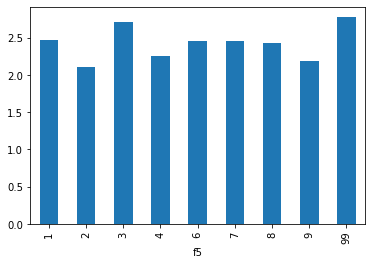

In [16]:
# mean_by_gender_and_occupation[1].plot(kind="bar")
mean_by_gender_and_occupation[2].plot(kind="bar")

<AxesSubplot:xlabel='q18'>

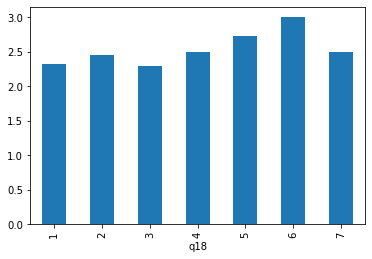

In [17]:
mean_by_gender_and_location_of_living[2].plot(kind = "bar")

In [18]:
#----------------------------------------------------------------------------#
#Standard Variation of the level of interest among all survey metrics#  
#----------------------------------------------------------------------------#
std_loi_market_amongall = survey_raw.groupby("q17")['q5'].std()
std_loi_market_amongall.sort_values(ascending = False)[:10]

q17
2    1.268777
1    1.215183
4    1.183669
3    1.160198
7    1.112697
5    1.082636
6         NaN
Name: q5, dtype: float64

<AxesSubplot:title={'center':'Mean of loi in relation with age'}, xlabel='Age_Catagory'>

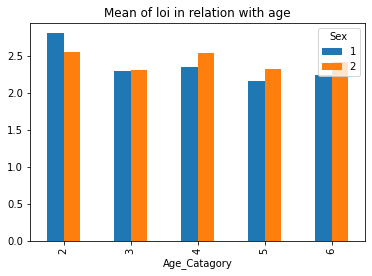

In [19]:
#----------------------------------------------------------------------#
# Standard Variation of the level of interest among all survey metrics #  
#----------------------------------------------------------------------#
ditribution_of_loi_basedOn_ageGroup = survey_raw.pivot_table('q5', index = "Age_Catagory",columns="Sex",aggfunc = "mean")
ditribution_of_loi_basedOn_ageGroup.plot(kind="bar",title = "Mean of loi in relation with age")

In [1]:
prob = [1/169911,5/169911,125/169911,3250/169911]
rew = [10046800,144300,10000,1000]
sum_ = 0
for i in range(len(prob)):
    sum_+=prob[i]*rew[i]    
print(sum_)

89.86057406524593
